# Chapter 2: Graphs 

## Think Complexity Second Edition by Alan Downey

In [1]:
import networkx as nx
import numpy as np

import plotly_express as px

COLORS = px.colors.qualitative.Alphabet

{('Albany', 'Boston'): Text(-72.5, 42.5, '3'),
 ('Albany', 'NYC'): Text(-74.0, 42.0, '4'),
 ('Boston', 'NYC'): Text(-72.5, 41.5, '4'),
 ('NYC', 'Philly'): Text(-74.5, 40.5, '2')}

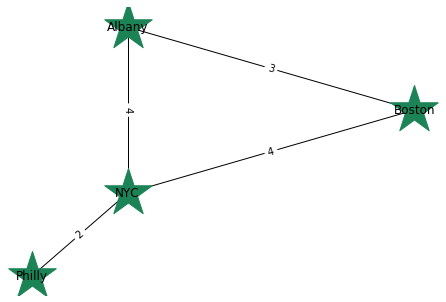

In [2]:


G = nx.Graph()

positions = dict(Albany=(-74, 43),
                 Boston=(-71, 42),
                 NYC=(-74, 41),
                 Philly=(-75, 40))

G.add_nodes_from(positions)


drive_times = {('Albany', 'Boston'): 3,
               ('Albany', 'NYC'): 4,
               ('Boston', 'NYC'): 4,
               ('NYC', 'Philly'): 2}

G.add_edges_from(drive_times)


nx.draw(G, positions, node_color=np.random.choice(COLORS), node_shape='*', node_size=2500, with_labels=True)
nx.draw_networkx_edge_labels(G, positions, edge_labels=drive_times)

{('Albany', 'Boston'): Text(-72.5, 42.5, '3'),
 ('Albany', 'NYC'): Text(-74.0, 42.0, '4'),
 ('Boston', 'NYC'): Text(-72.5, 41.5, '4'),
 ('NYC', 'Philly'): Text(-74.5, 40.5, '2'),
 ('Montreal', 'NYC'): Text(-73.8, 43.25, '6')}

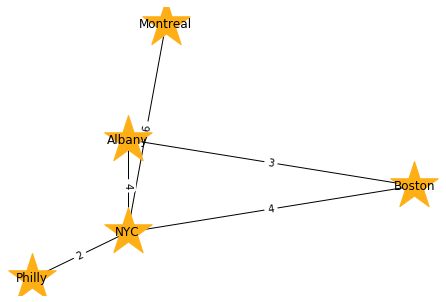

In [3]:
positions['Montreal'] = (-73.6, 45.5)
drive_times[('Montreal', 'NYC')] = 6 

G.update(nodes=positions, edges=drive_times)

nx.draw(G, positions, node_color=np.random.choice(COLORS), node_shape='*', node_size=2500, with_labels=True)
nx.draw_networkx_edge_labels(G, positions, edge_labels=drive_times)

In [4]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v
                
        
list(all_pairs(range(4)))

def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

Gc = make_complete_graph(5)
list(Gc.edges)

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

In [5]:
complete = make_complete_graph(10)
complete.number_of_nodes()

len(complete.edges)

10

45

In [6]:
def all_directed_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i != j:
                yield u, v
                
def make_complete_digraph(n):
    G = nx.DiGraph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    
    edges = all_directed_pairs(nodes)
    
    G.add_edges_from(edges)
    
    return G

20

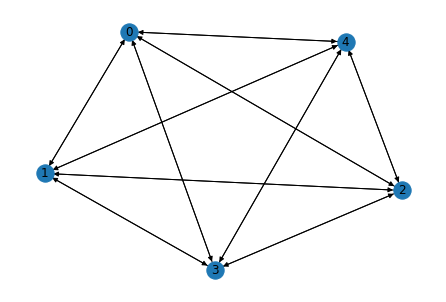

In [7]:
directed_complete = make_complete_digraph(5)
len(directed_complete.edges)

nx.draw(directed_complete, with_labels=True)

In [8]:
def flip(p):
    return np.random.random() < p

def random_pairs(nodes, p):
    for edge in all_pairs(nodes):
        if flip(p):
            yield edge

In [9]:
def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

In [10]:
np.random.seed(100)
random_graph = make_random_graph(10, 0.2)
len(random_graph.edges())

13

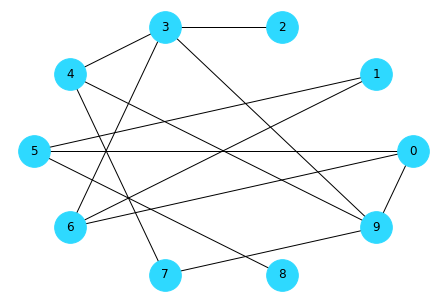

In [11]:
nx.draw_circular(random_graph, 
                 node_color=np.random.choice(COLORS), 
                 node_size=1000, 
                 with_labels=True)

In [12]:
def reachable_nodes(G, start):
    seen = []
    stack = [start]
    
    while len(stack) > 0:
        node = stack.pop()
        neighbors = G.neighbors(node)
        for n in neighbors:
            if n not in seen:
                seen.append(n)
                stack.append(n)
                
    return seen

reachable_nodes(G, 'Montreal')

['NYC', 'Albany', 'Boston', 'Philly', 'Montreal']

In [13]:
def reachable_nodes_book(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

reachable_nodes_book(G, 'Montreal')

{'Albany', 'Boston', 'Montreal', 'NYC', 'Philly'}

In [14]:
reachable_nodes(complete, 0)
reachable_nodes_book(complete, 0)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 0]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [15]:
reachable_nodes(random_graph, 1)
reachable_nodes_book(random_graph, 1)

[5, 6, 0, 1, 3, 2, 4, 9, 7, 8]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [16]:
for n, p in zip([100, 200, 300], [0.1, 0.2, 0.5]):
    graph = make_random_graph(n, p)
    assert set(reachable_nodes(graph, 0)) == reachable_nodes_book(graph, 0)

In [17]:
np.random.seed(40)
test_random = make_random_graph(1000, 0.15)

In [18]:
%%timeit
reachable_nodes(test_random, 0)

2.37 s ± 448 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
%%timeit 
reachable_nodes_book(test_random, 0)

35.2 ms ± 13.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [20]:
def is_connected(G):
    return len(G.nodes) == len(reachable_nodes_book(G, list(G.nodes.keys())[0]))

is_connected(complete)

True

In [21]:
is_connected(test_random)

True

In [22]:
low_p_random = make_random_graph(8, 0.1)
is_connected(low_p_random)

False

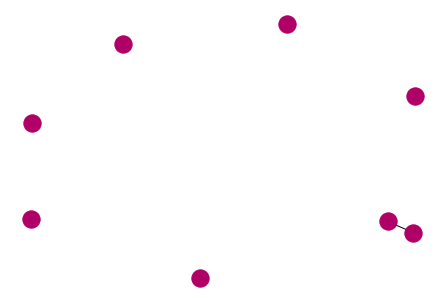

In [23]:
nx.draw(low_p_random, node_color=np.random.choice(COLORS))

In [24]:
def reachable_nodes_directed(G, start):
    seen = set()
    stack = [start]
    
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.successors(node))
            
    return seen

def is_connected_directed(G):

    return len(G.nodes) == len(reachable_nodes_directed(G, list(G.nodes.keys())[0]))

In [25]:
is_connected_directed(make_complete_digraph(10))

True

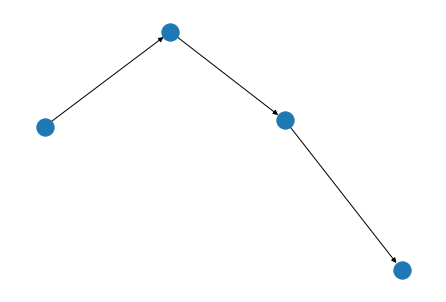

In [26]:
not_connected_digraph = nx.DiGraph()
not_connected_digraph.add_nodes_from([0, 1, 2, 3])
not_connected_digraph.add_edges_from([(0, 1), (1, 2), (3, 0)])

nx.draw(not_connected_digraph)

In [27]:
is_connected_directed(not_connected_digraph)

False

In [28]:
def prob_connected(n, p, iters):
    return np.mean([is_connected(make_random_graph(n, p)) for _ in range(iters)])

for n, p in zip([10, 15, 20], [0.1, 0.15, 0.2]):
    print(f'The probability of a graph being connected with {n} nodes and {p} probability two nodes are connected is {prob_connected(n, p, 100):.2f}%.')

The probability of a graph being connected with 10 nodes and 0.1 probability two nodes are connected is 0.01%.
The probability of a graph being connected with 15 nodes and 0.15 probability two nodes are connected is 0.16%.
The probability of a graph being connected with 20 nodes and 0.2 probability two nodes are connected is 0.81%.


In [29]:
def pstar(n):
    return np.log(n) / n

pstar(10)

0.23025850929940458

In [30]:
ns = np.arange(2, 25)
ps = np.linspace(0.1, 0.61, num=50)

from itertools import product
from collections import defaultdict
results = []

for n, p in product(ns, ps):
    results.append((n, p, prob_connected(n, p, 100)))

In [31]:
import pandas as pd
import cufflinks as cf

probs = pd.DataFrame(results, columns=['n', 'edge_prob', 'connected_prob'])

pstar_comparison = probs.groupby('n').apply(lambda x: x.loc[x['connected_prob'] > 0.5, 'edge_prob'].min()).to_frame().rename(columns={0:'empirical'})
pstar_comparison['theoretical'] = pstar(pstar_comparison.index)
pstar_comparison

empirical  theoretical
n                         
2    0.433061     0.346574
3    0.495510     0.366204
4    0.412245     0.346574
5    0.412245     0.321888
6    0.349796     0.298627
7    0.328980     0.277987
8    0.318571     0.259930
9    0.287347     0.244136
10   0.266531     0.230259
11   0.245714     0.217990
..        ...          ...
15   0.204082     0.180537
16   0.204082     0.173287
17   0.193673     0.166660
18   0.183265     0.160576
19   0.162449     0.154970
20   0.172857     0.149787
21   0.172857     0.144977
22   0.162449     0.140502
23   0.162449     0.136326
24   0.141633     0.132419

[23 rows x 2 columns]

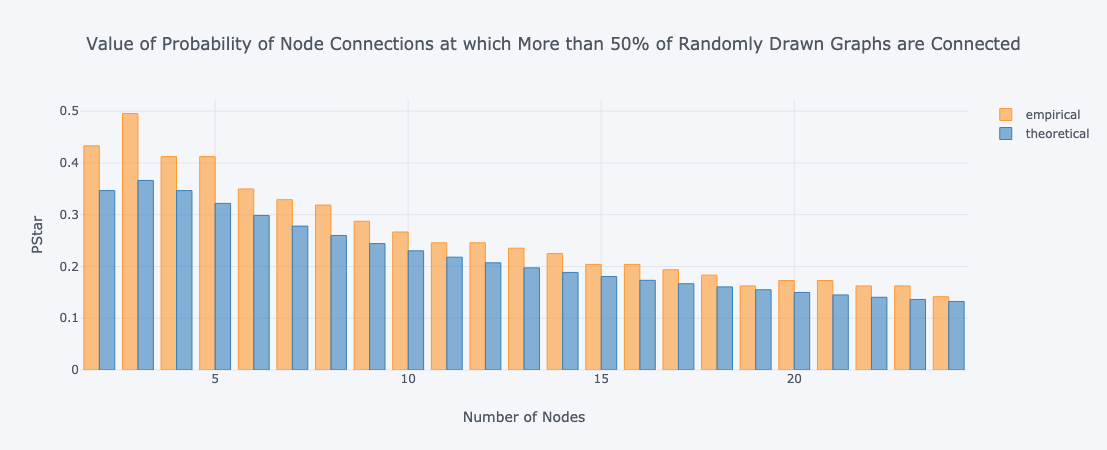

In [32]:
pstar_comparison.iplot(kind='bar', xTitle='Number of Nodes', yTitle='PStar', title='Value of Probability of Node Connections at which More than 50% of Randomly Drawn Graphs are Connected')

In [33]:
probs.head()

n  edge_prob  connected_prob
0  2   0.100000            0.07
1  2   0.110408            0.12
2  2   0.120816            0.12
3  2   0.131224            0.14
4  2   0.141633            0.13

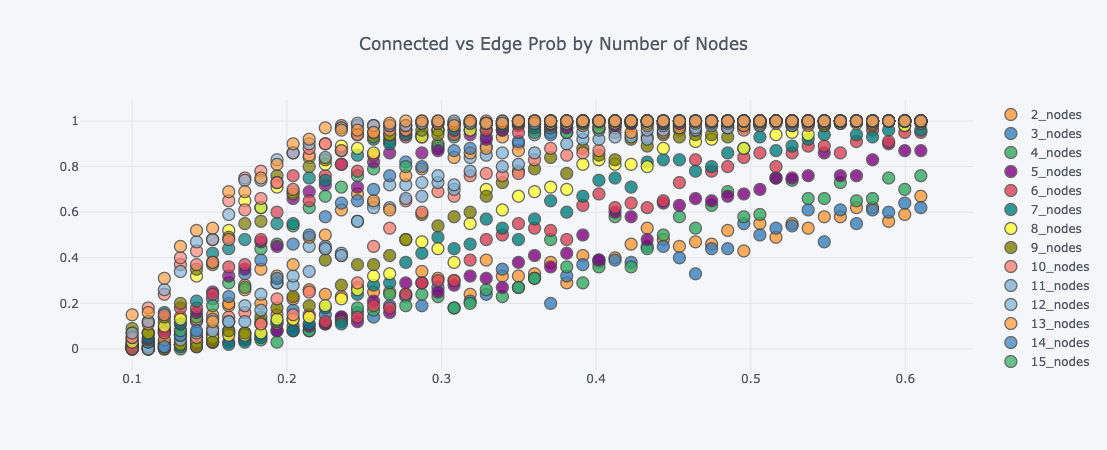

In [34]:
probs['nodes'] = [f'{n}_nodes' for n in probs['n']]
probs.iplot(
    mode='lines',
    x="edge_prob",
    y="connected_prob",
    categories="nodes",
    title="Connected vs Edge Prob by Number of Nodes",
)

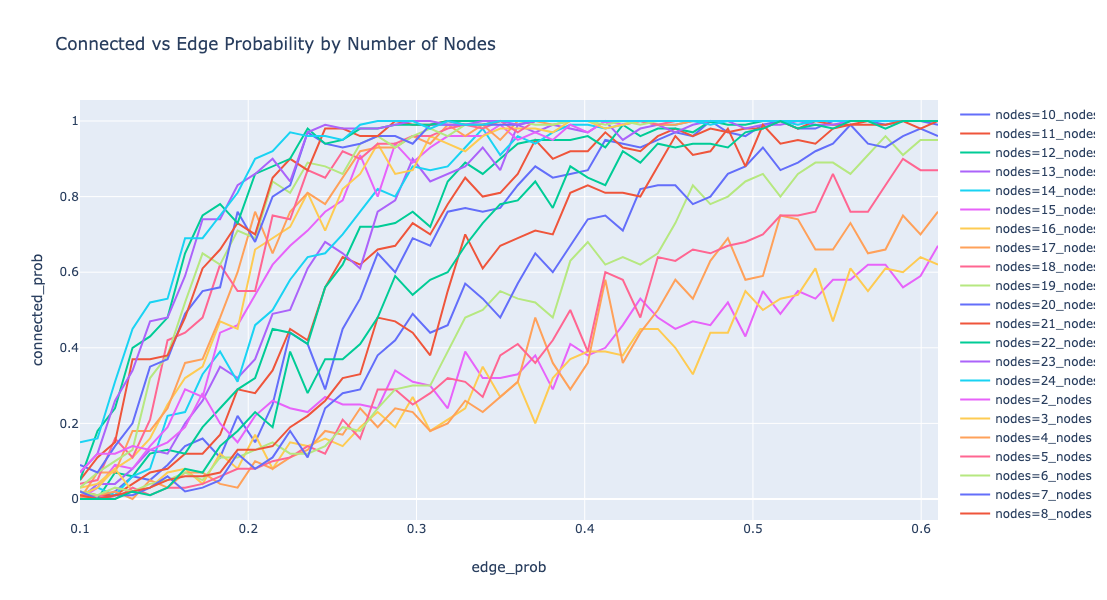

In [43]:
fig = px.line(
    probs,
    x="edge_prob",
    y="connected_prob",
    color="nodes",
    title="Connected vs Edge Probability by Number of Nodes",
)
fig

In [36]:
import random
random.sample([(1, 0), (2, 3)], 1)

[(2, 3)]

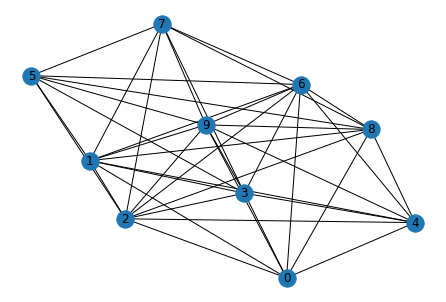

In [37]:
def make_random_graph_alt(n, m):
    nodes = range(n)
    all_edges = all_pairs(nodes)

    if m > ((n**2) - n) / 2:
        raise ValueError('More edges than is possible!')
    
    selected_edges = random.sample(list(all_edges), m)
    
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(selected_edges)
    
    return G

random_G = make_random_graph_alt(10, 40)
nx.draw(random_G, with_labels=True)

In [38]:
def prob_connected_alt(n, m, iters):
    return np.mean([is_connected(make_random_graph_alt(n, m)) for _ in range(iters)])

In [39]:
ns = np.arange(2, 21)
ps = np.linspace(0.1, 0.61, num=50)

results = []

for n, p in product(ns, ps):
    m = int( p * ( (n ** 2) - n) / 2)
    
    
    prob_connected_graph = prob_connected_alt(n, m, 100)
    
    results.append((n, p, m, prob_connected_graph))
    
results = pd.DataFrame(results, columns=['n_nodes', 'prob_edge', 
                                        'n_edges', 'prob_connected'])
results.head()
    

n_nodes  prob_edge  n_edges  prob_connected
0        2   0.100000        0             0.0
1        2   0.110408        0             0.0
2        2   0.120816        0             0.0
3        2   0.131224        0             0.0
4        2   0.141633        0             0.0

In [40]:
pstar_comparison = results.groupby('n_nodes').apply(lambda x: x.loc[x['prob_connected'] > 0.5, 'prob_edge'].min()).to_frame().rename(columns={0: 'empirical'})
pstar_comparison['theoretical'] = pstar(pstar_comparison.index)
pstar_comparison

empirical  theoretical
n_nodes                        
2              NaN     0.346574
3              NaN     0.366204
4         0.505918     0.346574
5         0.401837     0.321888
6         0.391429     0.298627
7         0.339388     0.277987
8         0.328980     0.259930
9         0.287347     0.244136
10        0.287347     0.230259
11        0.256122     0.217990
12        0.235306     0.207076
13        0.224898     0.197304
14        0.214490     0.188504
15        0.204082     0.180537
16        0.193673     0.173287
17        0.193673     0.166660
18        0.183265     0.160576
19        0.162449     0.154970
20        0.172857     0.149787

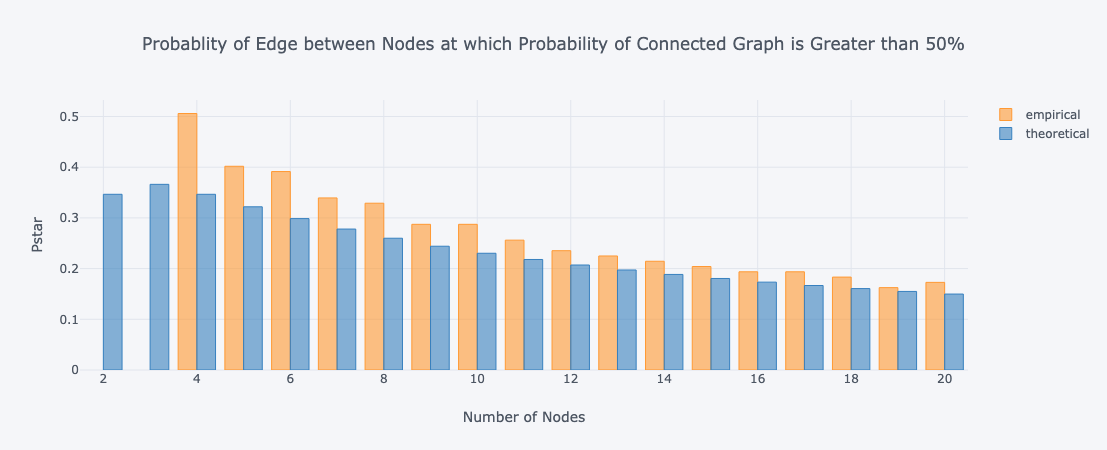

In [41]:
pstar_comparison.iplot(kind='bar', xTitle='Number of Nodes', yTitle='Pstar', title='Probablity of Edge between Nodes at which Probability of Connected Graph is Greater than 50%')

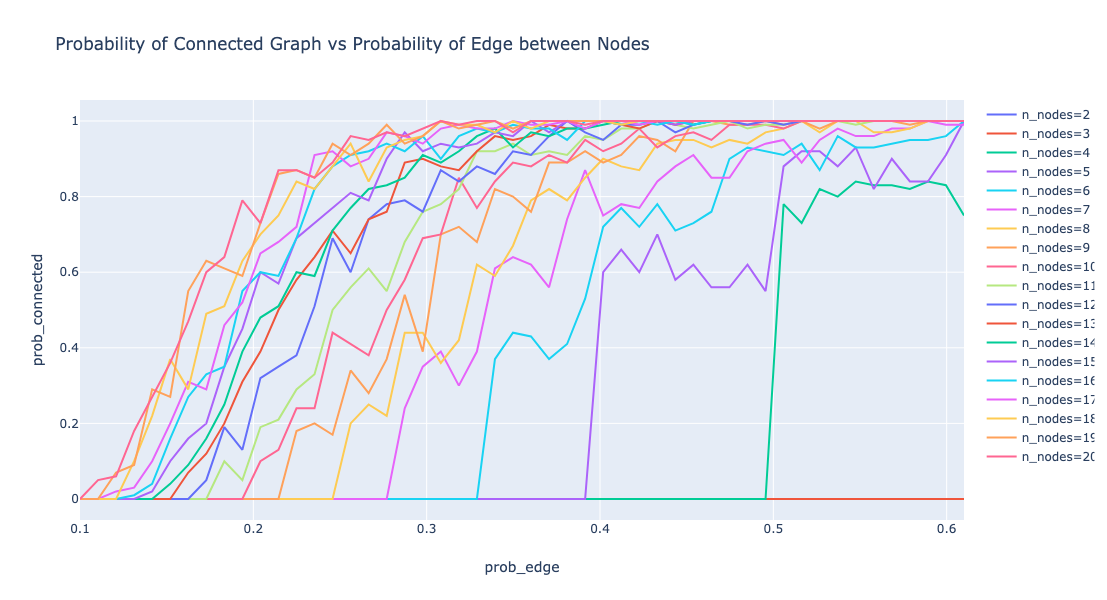

In [42]:
px.line(results, x='prob_edge', y='prob_connected', color='n_nodes', title='Probability of Connected Graph vs Probability of Edge between Nodes')